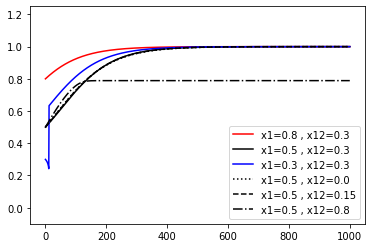

In [2]:
# simulate
#figure5
import matplotlib.pyplot as plt
import math
%matplotlib inline

# paras
h1 = 8; h2 = 1; x12 = 0.5; x21=0.3 ;ta=20 ;r=15 ;T=600 ;p=0.1
#x1 = [0.3]
#x2 = [1 - x1[0]]
dt = 0.001
u=[0.8,0.5,0.3,0.5,0.5,0.5]#x1
q=[0.3,0.3,0.3,0.0,0.15,0.8]#x12
m=[]#return x1's
for i in range(len(u)):
    x1 = [u[i]]
    x2 = [1 - x1[0]]
    x12=q[i]
    # fitnesses
    F1 = [(((h1*(x1[0]-x12))/((h1*(x1[0]-x12))+(h2*(x2[0]-x21))))*(r*(math.exp(-10*(ta/T))))-(p*h1*(x1[0]-x12))) * dt]
    F2 = [(((h2*(x2[0]-x21))/((h1*(x1[0]-x12))+(h2*(x2[0]-x21))))*(r*(math.exp(-10*(ta/T))))-(p*h2*(x2[0]-x21))) * dt]
    F = [(x1[0] * F1[0] + x2[0] * F2[0]) * dt]

    for t in range(1000):
        # fitnesses
        f1 = ((((h1*(x1[t]-x12))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-10*(ta/T))))-(p*h1*(x1[t]-x12))) 
        f2 = ((((h2*(x2[t]-x21))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-10*(ta/T))))-(p*h2*(x2[t]-x21)))
        ff = x1[t] * f1 + x2[t] * f2
        F1.append(f1*dt)
        F2.append(f2*dt)
        F.append(ff*dt)
        # differential equations for shares
        x1.append(x1[t] + ((x1[t]*(1-x1[t])*(f1-f2)) * dt))
        x2.append(x2[t] + ((x2[t]*(1-x2[t])*(f2-f1)) * dt))
        #x1.append(x1[t] + ((x1[t]*(f1-ff)) * dt))
        #x2.append(x2[t] + ((x2[t]*(f2-ff)) * dt))
    m.append(x1)
    color=["r","k","b","k:",'k--',"k-."]
for i in range(len(m)):
    plt.plot(m[i],color[i], label = 'x1='+str(u[i])+' , x12='+str(q[i]))
    #plt.plot(x2, 'b', label = 'share of poo2')
    #plt.plot(F1, 'r--', label ='fitness of cooperators')
    #plt.plot(F2, 'b--', label ='fitness of defectors')
    #plt.plot(F, 'g--', label ='mean population fitness')
    plt.legend(loc = 'best')
    plt.ylim(-0.1, 1.25)
    plt.grid()
